In [1]:
import pandas as pd
df = pd.read_csv('C001_FakeHypotension.csv')
print(df.head())

   Unnamed: 0        MAP  diastolic_bp  systolic_bp      urine        ALT  \
0           0  67.964940     56.709198   144.578430  241.00052  24.226444   
1           1  63.603493     53.635162   143.283780  230.52171  23.933348   
2           2  65.750670     56.904236   143.534000  217.76741  21.803823   
3           3  44.684580     41.952940   117.236534  291.90466  33.613720   
4           4  61.486233     63.960106   111.537060  435.26230  45.407272   

         AST        PO2  lactic_acid  serum_creatinine  ...  GCS_total  \
0  23.811718   83.46306     1.477299          0.893153  ...         15   
1  30.188170  120.01681     1.733099          0.862924  ...         15   
2  26.318861   84.16420     1.375228          0.819521  ...         15   
3  24.136852  102.35325     1.252799          0.754315  ...         15   
4  23.192320   63.73771     1.845126          1.155209  ...         15   

   urine_m  ALT_AST_m  FiO2_m  GCS_total_m  PO2_m  lactic_acid_m  \
0        0          0   

In [2]:
state_columns = ['MAP', 'diastolic_bp', 'systolic_bp', 'urine', 'ALT', 'AST', 'PO2', 'lactic_acid', 'serum_creatinine', 'FiO2', 'GCS_total']
action_columns = ['fluid_boluses', 'vasopressors']

MAP


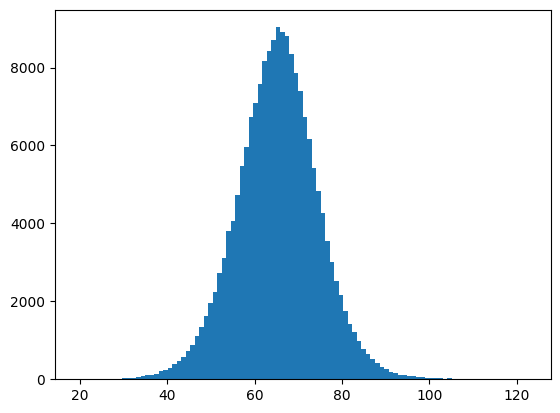

Min: 19.392052
Max: 122.63299
Average: 65.24478577575661
Standard Deviation: 9.331872470777064



diastolic_bp


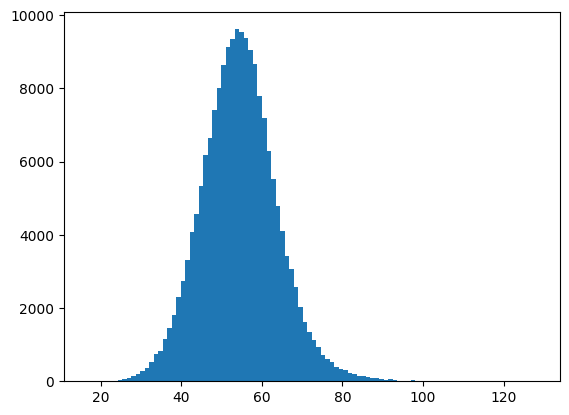

Min: 16.42613
Max: 128.29489
Average: 54.53406438683396
Standard Deviation: 9.393272237571988



systolic_bp


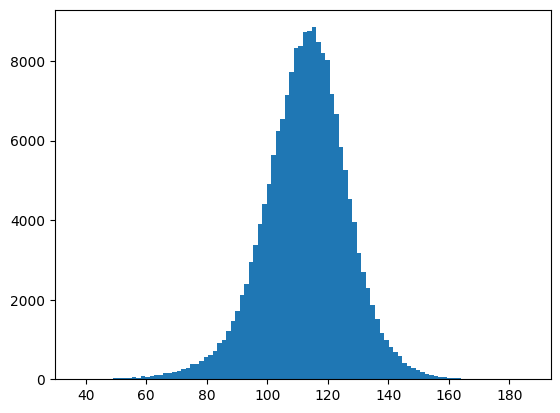

Min: 37.250717
Max: 186.29512
Average: 112.61721504659526
Standard Deviation: 14.001782821968984



urine


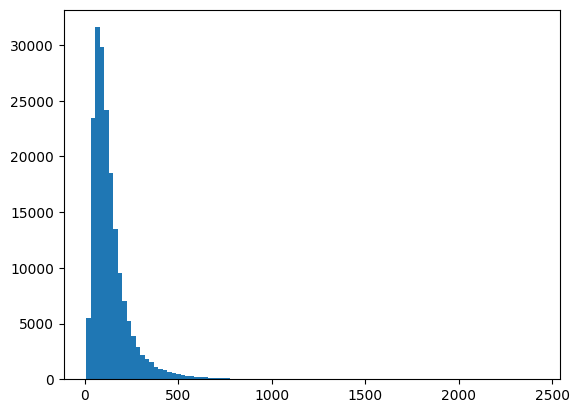

Min: 6.7349668
Max: 2419.2454
Average: 134.82951059155636
Standard Deviation: 106.49927603971628



ALT


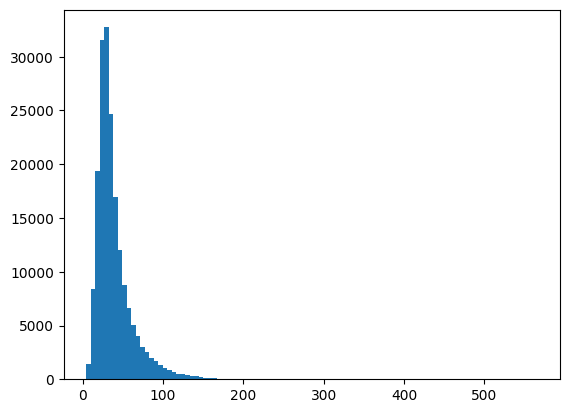

Min: 4.4271393
Max: 565.5222
Average: 39.188745477165924
Standard Deviation: 23.977531374662952



AST


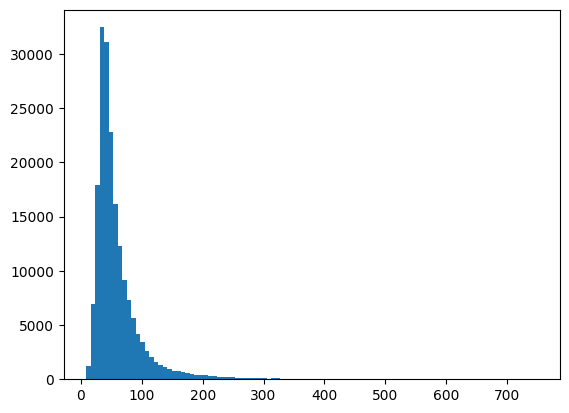

Min: 8.623325
Max: 749.3293
Average: 59.1528828795956
Standard Deviation: 41.45965721865672



PO2


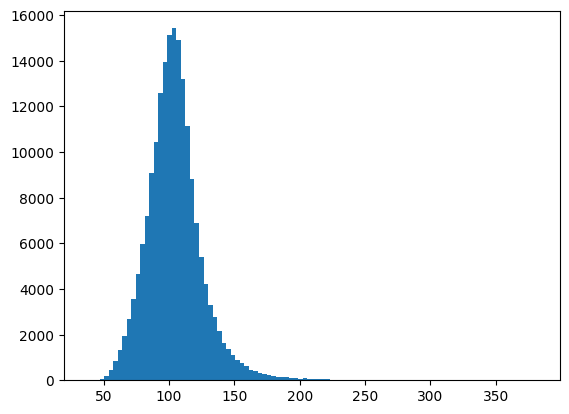

Min: 36.558357
Max: 381.82248
Average: 104.41759479013746
Standard Deviation: 21.525885548333907



lactic_acid


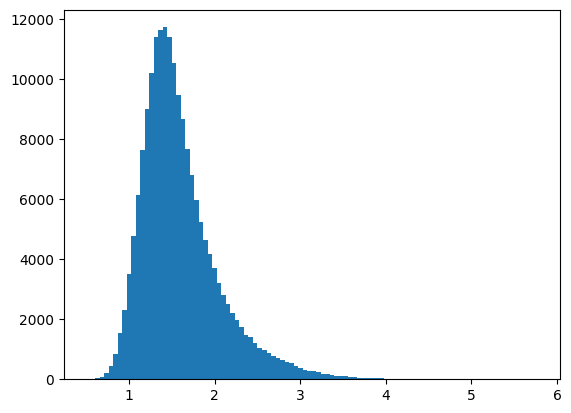

Min: 0.4954983
Max: 5.766668
Average: 1.5963214295118817
Standard Deviation: 0.46051106802228264



serum_creatinine


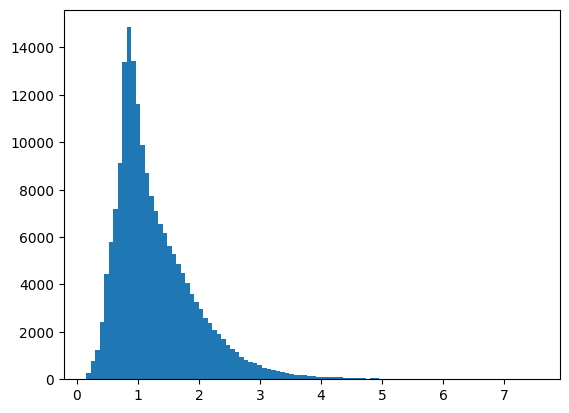

Min: 0.1529864
Max: 7.5403175
Average: 1.2977292914797527
Standard Deviation: 0.6876770453218878



FiO2


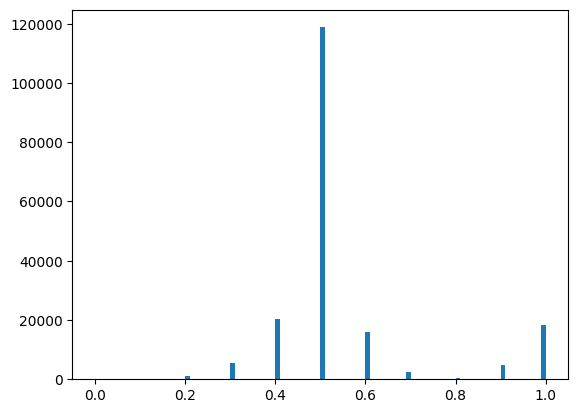

Min: 0.0
Max: 1.0
Average: 0.5529108056265984
Standard Deviation: 0.17336343333568324



GCS_total


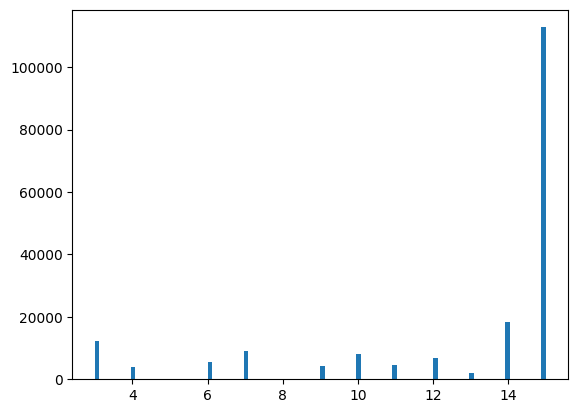

Min: 3
Max: 15
Average: 12.645012787723784
Standard Deviation: 3.8470145776911187



fluid_boluses


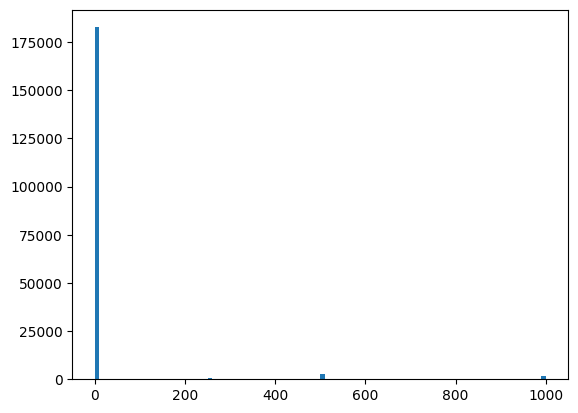

Min: 0
Max: 1000
Average: 17.42593776641091
Standard Deviation: 113.81422903526308



vasopressors


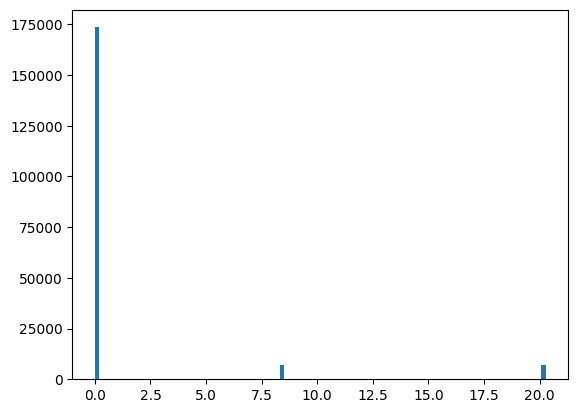

Min: 0.0
Max: 20.28
Average: 1.0870678583173485
Standard Deviation: 4.145758108249978





In [24]:
import matplotlib.pyplot as plt

for column in state_columns + action_columns:
    print(column)
    plt.hist(df[column], bins=100)
    plt.show()
    min_value = df[column].min()
    max_value = df[column].max()
    average = df[column].mean()
    std_dev = df[column].std()

    print(f'Min: {min_value}')
    print(f'Max: {max_value}')
    print(f'Average: {average}')
    print(f'Standard Deviation: {std_dev}')
    print("\n\n")   

In [3]:

binned_df = pd.DataFrame()

map_bins = [0, 70, 100, 130]
binned_df['MAP'] = pd.cut(df['MAP'], bins=map_bins, labels=['Low', 'Normal', 'High'])

dbp_bins = [0, 40, 60, 80, 130]
binned_df['diastolic_bp'] = pd.cut(df['diastolic_bp'], bins=dbp_bins, labels=['Severely Low', 'Low', 'Normal', 'High'])

sbp_bins = [0, 90, 120, 200]
binned_df['systolic_bp'] = pd.cut(df['systolic_bp'], bins=sbp_bins, labels=['Low', 'Normal', 'High'])

urine_bins = [0, 33, 83, 2500]
binned_df['urine'] = pd.cut(df['urine'], bins=urine_bins, labels=['Severely Low', 'Low', 'Normal'])

alt_bins = [0, 40, 120, 300, 1000]
binned_df['ALT'] = pd.cut(df['ALT'], bins=alt_bins, labels=['Normal', 'Slightly High', 'High', 'Severely High'])

ast_bins = [0, 40, 120, 300, 1000]
binned_df['AST'] = pd.cut(df['AST'], bins=ast_bins, labels=['Normal', 'Slightly High', 'High', 'Severely High'])

po2_bins = [0, 75, 100, 400]
binned_df['PO2'] = pd.cut(df['PO2'], bins=po2_bins, labels=['Low', 'Normal', 'High'])

la_bins = [0, 2.2, 4, 6]
binned_df['lactic_acid'] = pd.cut(df['lactic_acid'], bins=la_bins, labels=['Normal', 'High', 'Severely High'])

sc_bins = [0, 1.2, 4, 8]
binned_df['serum_creatinine'] = pd.cut(df['serum_creatinine'], bins=sc_bins, labels=['Normal', 'High', 'Severely High'])

fio2_bins = [0, 0.35, 0.65, 1]
binned_df['FiO2'] = pd.cut(df['FiO2'], bins=fio2_bins, labels=['Low', 'Normal', 'High'])

gcs_bins = [3, 7, 14, 15]
binned_df['GCS_total'] = pd.cut(df['GCS_total'], bins=gcs_bins, labels=['Low', 'Normal', 'High'])

boluses_bins = [-1, 200, 400, 600, 800, 1000]
binned_df['fluid_boluses'] = pd.cut(df['fluid_boluses'], bins=boluses_bins, labels=['Level 1', 'Level 2', 'Level 3', 'Level 4', 'Level 5'])

vasopressors_bins = [-1, 4.2, 8.4, 12.6, 16.8, 21]
binned_df['vasopressors'] = pd.cut(df['vasopressors'], bins=vasopressors_bins, labels=['Level 1', 'Level 2', 'Level 3', 'Level 4', 'Level 5'])


In [4]:
#reward function: SOFA score measures patient health (higher score/increase in score should be penalised)
#referenced from: Deep Reinforcement Learning for Sepsis Treatment
def calculate_reward(cur_score, next_score):
    reward = 0
    c0 = -0.025
    c1 = -0.125
    if cur_score == next_score and next_score > 0:
        reward += c0
    return reward + c1 * (next_score - cur_score)

#calculate SOFA score for each state
def calculate_sofa_score(MAP, urine, ALT, AST, PO2, lactic_acid, serum_creatinine, FiO2, GCS_total):
    cardiovascular_score = 0
    if MAP < 70:
        cardiovascular_score = 1
    
    respitory_score = 0
    if FiO2 > 0:
        p_f_ratio = PO2 / FiO2
        
        if p_f_ratio < 100:
            respitory_score = 4
        elif p_f_ratio < 200:
            respitory_score = 3
        elif p_f_ratio < 300:
            respitory_score = 2
        else:
            respitory_score = 1
    
    renal_score = 0
    if serum_creatinine >= 1.2 and serum_creatinine < 2:
        renal_score = 1
    elif serum_creatinine >= 2 and serum_creatinine < 3.5:
        renal_score = 2
    elif serum_creatinine >= 3.5 and serum_creatinine < 5:
        renal_score = 3
    elif serum_creatinine >= 5.0:
        renal_score = 4
    #divide daily urine output standards by 6 as the data is 4 hour interval
    if urine < 500.0 / 6:
        renal_score = max(renal_score, 3)
    if urine < 200.0 / 6:
        renal_score = max(renal_score, 4)

    #since bilirubin is not available, use ALT and AST to calculate liver score
    liver_score = 0
    if (ALT > 40 and AST > 40):
        liver_score = 1
    if (ALT > 120 or AST > 120):
        liver_score = 2
    if (ALT > 300 or AST > 300):
        liver_score = 3
    if (ALT > 1000 or AST > 1000):
        liver_score = 4

    neuro_score = 0
    if GCS_total < 6:
        neuro_score = 4
    elif GCS_total < 10:
        neuro_score = 3
    elif GCS_total < 13:
        neuro_score = 2
    elif GCS_total < 15:
        neuro_score = 1
    
    lactic_acid_score = 0
    if lactic_acid > 2:
        lactic_acid_score = 2
    
    return cardiovascular_score + respitory_score + renal_score + liver_score + neuro_score + lactic_acid_score


In [5]:
#processed_df = pd.DataFrame()

#used for reward calculation
binned_df['SOFA_score'] = df.apply(lambda row: calculate_sofa_score(row['MAP'], row['urine'], row['ALT'], row['AST'], row['PO2'], row['lactic_acid'], row['serum_creatinine'], row['FiO2'], row['GCS_total']), axis=1)

#actions
#boluses_bins = [0, 200, 400, 600, 800, 1000]
#processed_df['fluid_boluses'] = pd.cut(df['fluid_boluses'], bins=boluses_bins, labels=[0, 1, 2, 3, 4], include_lowest=True)
#processed_df['fluid_boluses'] = processed_df['fluid_boluses'].astype(int)

#vasopressors_bins = [0, 4.2, 8.4, 12.6, 16.8, 21]
#processed_df['vasopressors'] = pd.cut(df['vasopressors'], bins=vasopressors_bins, labels=[0, 1, 2, 3, 4], include_lowest=True)
#processed_df['vasopressors'] = processed_df['vasopressors'].astype(int)

#processed_df['ActionID'] = processed_df['fluid_boluses'] * 5 + processed_df['vasopressors']

for column in binned_df.columns:
    binned_df[column] = pd.Categorical(binned_df[column]).codes

#time series
binned_df['PatientID'] = df['PatientID']
binned_df['Timepoints'] = df['Timepoints']

In [7]:
print(binned_df.head())

   MAP  diastolic_bp  systolic_bp  urine  ALT  AST  PO2  lactic_acid  \
0    0             1            2      2    0    0    1            0   
1    0             1            2      2    0    0    2            0   
2    0             1            2      2    0    0    1            0   
3    0             1            1      2    0    0    2            0   
4    0             2            1      2    1    0    0            0   

   serum_creatinine  FiO2  GCS_total  fluid_boluses  vasopressors  SOFA_score  \
0                 0     2          2              0             0           4   
1                 0     2          2              0             0           3   
2                 0     2          2              0             0           4   
3                 0     2          2              0             0           3   
4                 0     2          2              0             0           4   

   PatientID  Timepoints  
0          0           0  
1          0           1  

In [8]:
binned_df.to_csv("binned_df.csv")

In [9]:

num_states = len(binned_df[state_columns].value_counts())
num_actions = len(binned_df[action_columns].value_counts())
print(num_states)
print(num_actions)

9109
12
